## Students Information

Please enter the names and IDs of the two students below:

1. **Name**: Yasmine Ashraf Ghanem  
   **ID**: `9203707` 

2. **Name**: Yasmin Abdullah Nasser  
   **ID**: `9203717` 


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities or post on the classroom.

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!





## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


> **Note:** You are allowed to install any other necessary libraries you deem useful for solving the lab. Please ensure that any additional libraries are compatible with the project requirements and are properly documented in your submission.


## Maximum Likelihood Estimator (MLE) Classifier
The Maximum Likelihood Estimator (MLE) is a fundamental statistical approach used to infer the parameters of a given distribution that are most likely to result in the observed data. In the context of image classification, MLE helps to quantify the probability of observing the data within each predefined class based on their distinct statistical properties. This method is highly effective for classifying images into categories by comparing the likelihoods of the data under different model parameters, enabling the most probable class assignment.

1. **Calculate Class Priors**: Estimate the probability of each class based on the training dataset. This is expressed as:
   $$
   P(C_k) = \frac{N_k}{N}
   $$
   where \(N_k\) is the number of samples of class \(k\) and \(N\) is the total number of samples.

2. **Estimate Class-specific Parameters**: For each class, estimate parameters such as the mean \(\mu_k\) and covariance \(\Sigma_k\) of features that describe the distribution of the data:
   $$
   \mu_k = \frac{1}{N_k} \sum_{x \in C_k} x
   $$
   $$
   \Sigma_k = \frac{1}{N_k} \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^T
   $$

3. **Compute Likelihoods**: For a given test instance \(x\), compute the likelihood of that instance belonging to each class using the estimated parameters:
   $$
   p(x | C_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
   $$

4. **Classify Based on Maximum Likelihood**: Assign the class label to each test instance based on the highest likelihood, which can be calculated as:
   $$
   \hat{y} = \arg\max_{k} P(C_k) \cdot p(x | C_k)
   $$

The Naive Bayes classifier is perhaps the most well-known application of the Maximum Likelihood Estimator principle in classification tasks. It assumes that the features in each class are independent, simplifying the computation of likelihoods. While Naive Bayes is popular for its simplicity and efficiency, it is not the only technique that leverages the MLE approach. Other classical alternatives include Logistic Regression, which applies MLE to estimate the parameters that best predict categorical outcomes, and Gaussian Mixture Models, which use MLE to estimate the parameters of multiple Gaussian distributions within the data. Students are encouraged to explore these models to gain a deeper understanding of statistical estimation techniques.


## Req- Image Classification for EuroSATallBands
Image classification is a key challenge in satellite imaging and remote sensing. As discussed in the lecture, this task is typically conducted on a pixel-wise basis because a single image can contain multiple textural elements of different celestial features. However, for this specific assignment, we will focus on identifying the dominant phenomena in the image as the basis for classification.

- **Load the Images**: Load the images of the EuroSAT dataset that belong to the **residential**, **river**, and **forest** classes.

- **Split the Dataset**: Split the dataset such that 10% of each class is used as testing data, and the remainder is used for training your classifier. Use the indices provided by `np.random.choice` with seed set to `27`. **Code is provided do not change it**.

- **Feature Extraction**: Extract suitable features from the images that you think might be relevant in distinguishing each class from the others. Keep in mind the curse of dimensionality when selecting features.

- **Implement a Maximum Likelihood Estimator (MLE)**: Implement a Maximum Likelihood Estimator (MLE) based on your training data. 
- **Report Accuracy and Average F1 Score**: After testing your classifier on the test set, report the **Accuracy** and **Average F1 Score** of your model.


In [1]:
# Add your libraries here
import numpy as np
import os
import cv2
import skimage
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# DO NOT CHANGE THIS CELL
## Training set indices.
np.random.seed(27)  # Set random seed for reproducibility

# Randomly select indices for the test sets for each class
residential_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
forest_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
river_test_indices = np.random.choice(np.arange(2500), size=250, replace=False)


In [121]:
def read_dataset(folder_path, type = 'rgb'):
    content = os.listdir(folder_path)

    print(content)

    # Read the images
    images = [] # List to store images
    labels = [] # 0: residential, 1: forest, 2: river

    residential_images = []
    forest_images = []
    river_images = []

    
    for folder in content:
        if folder.lower() == 'residential':
            images_in_folder = os.listdir(folder_path + '/' + folder)
            for image in images_in_folder:
                image_path = folder_path + '/' + folder + '/' + image
                
                image_read = cv2.imread(image_path) if type == 'rgb' else skimage.io.imread(image_path)

                images.append(image_read)
                residential_images.append(image_read)
                labels.append(0)

        elif folder.lower() == 'forest':
            images_in_folder = os.listdir(folder_path + '/' + folder)
            for image in images_in_folder:
                image_path = folder_path + '/' + folder + '/' + image

                image_read = cv2.imread(image_path) if type == 'rgb' else skimage.io.imread(image_path)

                images.append(image_read)
                forest_images.append(image_read)
                labels.append(1)

        elif folder.lower() == 'river':
            images_in_folder = os.listdir(folder_path + '/' + folder)
            for image in images_in_folder:
                image_path = folder_path + '/' + folder + '/' + image

                image_read = cv2.imread(image_path) if type == 'rgb' else skimage.io.imread(image_path)
                
                images.append(image_read)
                river_images.append(image_read)
                labels.append(2)

        else:
            continue

    return images, labels, residential_images, forest_images, river_images

def read_dataset_allbands(folder_path):
    content = os.listdir(folder_path)

    print(content)

    # Read the images
    images = [] # List to store images
    labels = [] # 0: residential, 1: forest, 2: river

    residential_images = []
    forest_images = []
    river_images = []

    
    for folder in content:
        if folder.lower() == 'residential':
            images_in_folder = os.listdir(folder_path + '/' + folder)
            for image in images_in_folder:
                image_path = folder_path + '/' + folder + '/' + image
                image_read = cv2.imread(image_path)
                images.append(image_read)
                residential_images.append(image_read)
                labels.append(0)

        elif folder.lower() == 'forest':
            images_in_folder = os.listdir(folder_path + '/' + folder)
            for image in images_in_folder:
                image_path = folder_path + '/' + folder + '/' + image
                image_read = cv2.imread(image_path)
                images.append(image_read)
                forest_images.append(image_read)
                labels.append(1)

        elif folder.lower() == 'river':
            images_in_folder = os.listdir(folder_path + '/' + folder)
            for image in images_in_folder:
                image_path = folder_path + '/' + folder + '/' + image
                image_read = cv2.imread(image_path)
                images.append(image_read)
                river_images.append(image_read)
                labels.append(2)

        else:
            continue

    return images, labels, residential_images, forest_images, river_images

def shuffle_dataset(images, labels):
    # shuffle the dataset
     
    # zip the images and labels together
    zipped_lists = list(zip(images, labels))

    # shuffle the zipped list
    np.random.shuffle(zipped_lists)

    # unzip the zipped list
    shuflled_images, shuffled_labels = zip(*zipped_lists)

    return shuflled_images, shuffled_labels

def split_dataset(residential_images, forest_images, river_images, residential_test_indices, forest_test_indices, river_test_indices):
    
    # Split the dataset into 90% training and 10% test

    # Sort the indices in reverse order to avoid index shifting when removing elements
    residential_test_indices.sort()
    forest_test_indices.sort()
    river_test_indices.sort()

    residential_test_indices = residential_test_indices[::-1]
    forest_test_indices = forest_test_indices[::-1]
    river_test_indices = river_test_indices[::-1]

    # Extract elements based on the indices and remove them from the original list
    residential_test_images = [residential_images.pop(index) for index in residential_test_indices]
    forest_test_images = [forest_images.pop(index) for index in forest_test_indices]
    river_test_images = [river_images.pop(index) for index in river_test_indices]

    # Create labels for the test images
    residential_test_labels = np.zeros(len(residential_test_images))
    forest_test_labels = np.ones(len(forest_test_images))
    river_test_labels = 2 * np.ones(len(river_test_images))

    # Concatenate the test images and labels 
    test_images = np.concatenate((residential_test_images, forest_test_images, river_test_images), axis=0)
    test_labels = np.concatenate((residential_test_labels, forest_test_labels, river_test_labels), axis=0)

    return residential_images, forest_images, river_images, test_images, test_labels

    
def extract_color_histogram(image, bins=(8, 8, 8)):
    # Convert the image from RGB to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the 3D color histogram
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256]) #input image, channels, mask, bins, range for each channel
    # hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    
    # Normalize the histogram
    hist = cv2.normalize(hist, hist).flatten()
    
    return hist

def texture_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the co-occurrence matrix for the image
    co_matrix = skimage.feature.graycomatrix(gray_image, [5], [0], levels=256, symmetric=True, normed=True)

    # Calculate texture features from the co-occurrence matrix
    contrast = skimage.feature.graycoprops(co_matrix, 'contrast')
    correlation = skimage.feature.graycoprops(co_matrix, 'correlation')
    energy = skimage.feature.graycoprops(co_matrix, 'energy')
    homogeneity = skimage.feature.graycoprops(co_matrix, 'homogeneity')

    return contrast[0][0], correlation[0][0], energy[0][0], homogeneity[0][0]

def calculate_ndvi(image):
    # Extract the red and near-infrared bands
    red = image[:, :, 3]
    nir = image[:, :, 7]

    # Calculate the NDVI
    
    # mean_ndvi = np.mean(ndvi)

    # Compute NDVI for each pixel
    denominator = nir + red

    # Check for zero division and invalid values
    valid_mask = np.logical_and(denominator != 0, np.logical_not(np.isnan(nir)), np.logical_not(np.isnan(red)))
    ndvi = np.where(valid_mask, (nir - red) / denominator, np.nan)

    # Calculate the average NDVI for the entire image
    mean_ndvi = np.nanmean(ndvi)

    return mean_ndvi

def calculate_ndwi(image):
    # Extract the green and near-infrared bands
    # green_band = image[:, :, 2]
    # nir_band = image[:, :, 7]

    
    channels = cv2.split(image)

    green = channels[2]
    nir = channels[7]

    # Calculate the NDWI
    ndwi = (green - nir) / (green + nir)

    mean_ndwi = np.mean(ndwi)

    # print("NDWI:", ndwi)

    return mean_ndwi

def extract_test_features(test_images, type='rgb'):
    test_features = []
    for image in test_images:
        channels = cv2.split(image)

        feature_vector = []
        means = []
        maxs = []
        mins = []

        # mean, max, and min per band
        for channel in channels:
            means.append(np.mean(channel))
            maxs.append(np.max(channel))
            mins.append(np.min(channel))

        # texture features
        bgr_image = image if type == 'rgb' else np.stack([channels[1], channels[2], channels[3]], axis=-1)

        # Optionally, normalize the pixel values to the [0, 255] range
        bgr_image = (bgr_image - np.min(bgr_image)) / (np.max(bgr_image) - np.min(bgr_image)) * 255
        bgr_image = bgr_image.astype(np.uint8)

        contrast, correlation, energy, homogeneity = texture_features(bgr_image)


        # feature_vector = [mean_b, mean_g, mean_r, max_b, max_g, max_r, min_b, min_g, min_r, contrast, correlation, energy, homogeneity]
        feature_vector.extend(means)
        feature_vector.extend(maxs)
        feature_vector.extend(mins)
        

        if type == 'rgb':
            feature_vector.extend([contrast, correlation, energy, homogeneity])
        else:
            # nvdi = calculate_ndvi(image)
            ndwi = calculate_ndwi(image)
            feature_vector.extend([contrast, correlation, energy, homogeneity, ndwi])

        test_features.append(feature_vector)

    
    test_features = np.reshape(test_features, (len(test_features), -1))
    return test_features


def extract_features(residential_images, forest_images, river_images, type='rgb'):

    # MEAN # MIN_PER_BAND # MAX_PER_BAND # TEXTURE_FEATURES # NDVI # NDWI 

	# Extract features for each class
    residential_features = []
    forest_features = []
    river_features = []

    for residential_image in residential_images:
        channels = cv2.split(residential_image)

        feature_vector = []
        means = []
        maxs = []
        mins = []

        # mean, max, and min per band
        for channel in channels:
            means.append(np.mean(channel))
            maxs.append(np.max(channel))
            mins.append(np.min(channel))

        # texture features
        bgr_image = residential_image if type == 'rgb' else np.stack([channels[1], channels[2], channels[3]], axis=-1)

        # Optionally, normalize the pixel values to the [0, 255] range
        bgr_image =  (bgr_image - np.min(bgr_image)) / (np.max(bgr_image) - np.min(bgr_image)) * 255
        bgr_image = bgr_image.astype(np.uint8)

        contrast, correlation, energy, homogeneity = texture_features(bgr_image)



        feature_vector.extend(means)
        feature_vector.extend(maxs)
        feature_vector.extend(mins)

        if type == 'rgb':
            feature_vector.extend([contrast, correlation, energy, homogeneity])
        else:
            # nvdi = calculate_ndvi(residential_image)
            ndwi = calculate_ndwi(residential_image)
            feature_vector.extend([contrast, correlation, energy, homogeneity, ndwi])    
        
        residential_features.append(feature_vector)
    
    for forest_image in forest_images:
        channels = cv2.split(forest_image)

        feature_vector = []
        means = []
        maxs = []
        mins = []

        # mean, max, and min per band
        for channel in channels:
            means.append(np.mean(channel))
            maxs.append(np.max(channel))
            mins.append(np.min(channel))

        # texture features
        bgr_image = forest_image if type == 'rgb' else np.stack([channels[1], channels[2], channels[3]], axis=-1)

        # Optionally, normalize the pixel values to the [0, 255] range
        bgr_image = (bgr_image - np.min(bgr_image)) / (np.max(bgr_image) - np.min(bgr_image)) * 255
        bgr_image = bgr_image.astype(np.uint8)

        contrast, correlation, energy, homogeneity = texture_features(bgr_image)

        feature_vector.extend(means)
        feature_vector.extend(maxs)
        feature_vector.extend(mins)

        if type == 'rgb':
            feature_vector.extend([contrast, correlation, energy, homogeneity])

        else:
            # nvdi = calculate_ndvi(forest_image)
            ndwi = calculate_ndwi(forest_image)
            feature_vector.extend([contrast, correlation, energy, homogeneity, ndwi])

        
        forest_features.append(feature_vector)
    
    for river_image in river_images:
        channels = cv2.split(river_image)

        feature_vector = []
        means = []
        maxs = []
        mins = []

        # mean, max, and min per band
        for channel in channels:
            means.append(np.mean(channel))
            maxs.append(np.max(channel))
            mins.append(np.min(channel))

        # texture features
        bgr_image = river_image if type == 'rgb' else np.stack([channels[1], channels[2], channels[3]], axis=-1)

        # Optionally, normalize the pixel values to the [0, 255] range
        bgr_image = (bgr_image - np.min(bgr_image)) / (np.max(bgr_image) - np.min(bgr_image)) * 255
        bgr_image = bgr_image.astype(np.uint8)

        contrast, correlation, energy, homogeneity = texture_features(bgr_image)

        feature_vector.extend(means)
        feature_vector.extend(maxs)
        feature_vector.extend(mins)

        if type == 'rgb':
            feature_vector.extend([contrast, correlation, energy, homogeneity])
        else:
            # nvdi = calculate_ndvi(river_image)
            ndwi = calculate_ndwi(river_image)
            feature_vector.extend([contrast, correlation, energy, homogeneity, ndwi])

        river_features.append(feature_vector)


    residential_features = np.reshape(residential_features, (len(residential_features), -1))
    forest_features = np.reshape(forest_features, (len(forest_features), -1))
    river_features = np.reshape(river_features, (len(river_features), -1))

    print("Residential Features:", len(residential_features), residential_features.shape)
    print("Forest Features:", len(forest_features), residential_features.shape)
    print("River Features:", len(river_features), river_features.shape)


    return residential_features, forest_features, river_features


def maximum_likelihood_estimation(residential_features, forest_features, river_features, test_images, type='rgb'):

    # Preprocessing #

    residential_shape = residential_features.shape
    forest_shape = forest_features.shape
    river_shape = river_features.shape

    # 1. calculate class priors
    prior_residential = residential_shape[0] / (residential_shape[0] + forest_shape[0] + river_shape[0])
    prior_forest = forest_shape[0] / (residential_shape[0] + forest_shape[0] + river_shape[0])
    prior_river = river_shape[0] / (residential_shape[0] + forest_shape[0] + river_shape[0])

    print("Prior Residential:", prior_residential)
    print("Prior Forest:", prior_forest)
    print("Prior River:", prior_river)

    # 2. calculate class means and covariance matrices
    mean_residential = np.mean(residential_features, axis=0)
    mean_forest = np.mean(forest_features, axis=0)
    mean_river = np.mean(river_features, axis=0)

    print("Mean Residential:", mean_residential)
    print("Mean Forest:", mean_forest)
    print("Mean River:", mean_river)


    # When dealing with image data, where each row typically corresponds to a pixel and each column corresponds to an image, it's common to set rowvar to False because you want to compute the covariance between pixels across all images (observations). 
    covariance_residential = np.cov(residential_features, rowvar=False)
    covariance_forest = np.cov(forest_features, rowvar=False)
    covariance_river = np.cov(river_features, rowvar=False)


    # 3. compute the likelihood of each class and classify the images
    # what is the d?? => feature vector dimension
    test_features = extract_test_features(test_images, type)

    print("Test Feature Shape:", test_features.shape)

    predicted_labels = []
    
    d = len(residential_features[0])
    print("Feature Vector Dimension:", d)

    for feature in test_features:
    
        likelihood_residential = (1/((2*np.pi)**(d/2)*np.sqrt(np.linalg.det(covariance_residential)))) * np.exp(-0.5 * np.dot(np.dot((feature - mean_residential), np.linalg.inv(covariance_residential)), (feature - mean_residential).T))
        likelihood_forest = (1/((2*np.pi)**(d/2)*np.sqrt(np.linalg.det(covariance_forest)))) * np.exp(-0.5 * np.dot(np.dot((feature - mean_forest), np.linalg.inv(covariance_forest)), (feature - mean_forest).T))
        likelihood_river = (1/((2*np.pi)**(d/2)*np.sqrt(np.linalg.det(covariance_river)))) * np.exp(-0.5 * np.dot(np.dot((feature - mean_river), np.linalg.inv(covariance_river)), (feature - mean_river).T))
        
        # 4. classify based on maximum likelihood
        maximum_likelihood = np.argmax([likelihood_residential * prior_residential, likelihood_forest * prior_forest, likelihood_river * prior_river])
        predicted_labels.append(maximum_likelihood)
    
    return predicted_labels

In [92]:
'''
    We have three classes in the dataset: residential, forest, and river.
    The image can be classified into one of these three classes.
    The dataset is divided into training and testing sets.
'''
# REQ1 For the RGB images dataset.

# Follow the steps 
# 1. Load the dataset 
images, labels, residential_images, forest_images, river_images = read_dataset('dataset/RGB')

# 2. Split the dataset into training and testing sets
rsidential_train, forest_train, river_train, test_images, test_labels = split_dataset(residential_images, forest_images, river_images, residential_test_indices, forest_test_indices, river_test_indices)

# 3. Extract the features from the images
residential_features, forest_features, river_features = extract_features(rsidential_train, forest_train, river_train)

print("Shapes: Residential:", residential_features.shape, "Forest:", forest_features.shape, "River:", river_features.shape)

# shuffle the test set
test_images, test_labels = shuffle_dataset(test_images, test_labels)

# 4. Implement the maximum likelihood estimation
predictions = maximum_likelihood_estimation(residential_features, forest_features, river_features, test_images)


['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Residential Features: 2700 (2700, 13)
Forest Features: 2700 (2700, 13)
River Features: 2250 (2250, 13)
Shapes: Residential: (2700, 13) Forest: (2700, 13) River: (2250, 13)
Prior Residential: 0.35294117647058826
Prior Forest: 0.35294117647058826
Prior River: 0.29411764705882354
Mean Residential: [1.13109282e+02 1.03822137e+02 1.00064387e+02 2.32910741e+02
 2.29814444e+02 2.32536296e+02 7.69059259e+01 6.43414815e+01
 4.66337037e+01 1.40997386e+03 1.50179135e-01 1.87631415e-02
 4.80246617e-02]
Mean Forest: [7.59321568e+01 6.44884486e+01 3.93939077e+01 9.87766667e+01
 9.17281481e+01 7.42322222e+01 6.68188889e+01 5.18685185e+01
 2.86644444e+01 2.70564217e+02 2.71314061e-01 5.08835316e-02
 1.18280601e-01]
Mean River: [9.70310591e+01 8.67843060e+01 6.73746654e+01 1.78311111e+02
 1.76190222e+02 1.80246222e+02 7.46164444e+01 5.73324444e+01
 3.48653333e+01 1.04

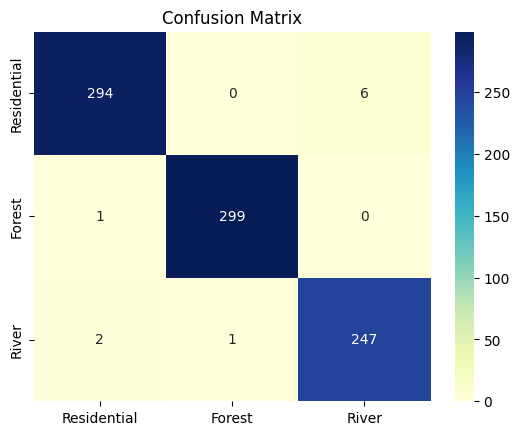

Accuracy: 0.9882352941176471
F1 Score: 0.9878995485490186


In [122]:
conf_matrix = confusion_matrix(test_labels, predictions)
accuracy = accuracy_score(test_labels, predictions)
f1_avg = f1_score(test_labels, predictions, average='macro')

ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Residential', 'Forest', 'River'], yticklabels=['Residential', 'Forest', 'River'])
ax.set_title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("F1 Score:", f1_avg)

In [123]:
# All bands
images, labels, residential_images, forest_images, river_images = read_dataset('dataset/tif', 'tif')

print("Image Shape:", images[0].shape)

# 2. Split the dataset into training and testing sets
rsidential_train, forest_train, river_train, test_images, test_labels = split_dataset(residential_images, forest_images, river_images, residential_test_indices, forest_test_indices, river_test_indices)

# # 3. Extract the features from the images
residential_features, forest_features, river_features = extract_features(rsidential_train, forest_train, river_train, type='tif')

print("Shapes: Residential:", residential_features.shape, "Forest:" ,forest_features.shape, "River:" ,river_features.shape)

# shuffle the test set
test_images, test_labels = shuffle_dataset(test_images, test_labels)

# 4. Implement the maximum likelihood estimation
predictions = maximum_likelihood_estimation(residential_features, forest_features, river_features, test_images, type='tif')



['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


Image Shape: (64, 64, 13)
Residential Features: 2700 (2700, 44)
Forest Features: 2700 (2700, 44)
River Features: 2250 (2250, 44)
Shapes: Residential: (2700, 44) Forest: (2700, 44) River: (2250, 44)
Prior Residential: 0.35294117647058826
Prior Forest: 0.35294117647058826
Prior River: 0.29411764705882354
Mean Residential: [1.45961243e+03 1.21469272e+03 1.11449102e+03 1.07557527e+03
 1.28787911e+03 1.98049786e+03 2.28660519e+03 2.18658596e+03
 6.64420141e+02 1.22817570e+01 1.97484657e+03 1.38201247e+03
 2.46938279e+03 1.66396259e+03 3.36112333e+03 3.43433704e+03
 3.85812704e+03 2.34852519e+03 3.23965852e+03 3.83382741e+03
 5.07973556e+03 8.74264815e+02 1.48700000e+01 3.34774963e+03
 2.75178519e+03 4.16224556e+03 1.32027222e+03 8.66441481e+02
 6.85007037e+02 4.74846667e+02 8.25914815e+02 1.26777556e+03
 1.40941815e+03 9.04347407e+02 5.23297037e+02 9.77185185e+00
 1.19777704e+03 6.78545926e+02 1.48838259e+03 7.84325518e+02
 1.44834961e-01 2.66952281e-02 7.40050645e-02 2.00976624e+01]
Mean F

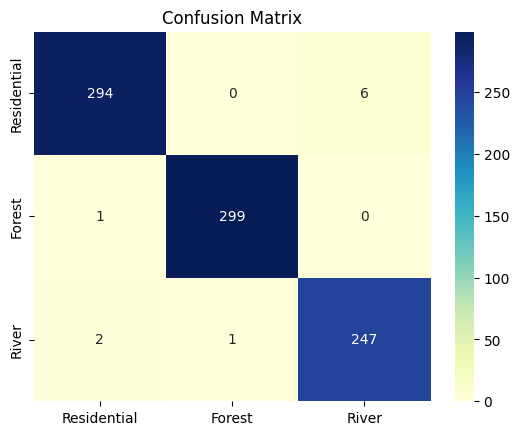

Accuracy: 0.9882352941176471
F1 Score: 0.9878995485490186


In [124]:
conf_matrix = confusion_matrix(test_labels, predictions)
accuracy = accuracy_score(test_labels, predictions)
f1_avg = f1_score(test_labels, predictions, average='macro')

ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Residential', 'Forest', 'River'], yticklabels=['Residential', 'Forest', 'River'])
ax.set_title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("F1 Score:", f1_avg)

### Grading Rubric (Total: 10 Marks)

The lab is graded based on the following criteria:

1. **Data Loading and Preparation (2 Marks)**
   - Correctly loads images for the residential, river, and forest classes. (0.5 Marks)
   - Accurately splits the dataset into training and testing subsets and clearly shows this split. (1.5 Marks)

2. **Feature Extraction (2 Marks)**
   - Implements feature extraction appropriately, considering the curse of dimensionality. (1 Mark)
   - Extracts and justifies the selection of features relevant to distinguishing the classes. (1 Mark)

3. **Implementation of MLE Classifier (3 Marks)**
   - Correctly calculates and clearly shows class priors and class-specific parameters. (1 Mark)
   - Accurately computes likelihoods using the likelihood equation (probability density function) and classifies based on maximum likelihood. Must clearly show these calculations and explain the choice of likelihood equation. (2 Marks)

4. **Model Evaluation and Understanding (3 Marks)**
   - Shows **confusion matrix** and correctly calculates and clearly shows the calculations for Accuracy and Average F1 Score. (1 Mark)
   - **Comparison amongst your peers.** Compares the model's performance against those of peers to identify strengths and areas for improvement. (2 Marks)

Each section of the lab will be evaluated on completeness, and correctness in approach and analysis. Part of the rubric also includes the student's ability to explain and justify their choices and results.


## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
